# Notebook setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import numpy as np
import matplotlib.pyplot as plt

import os
import sys

sys.path.insert(1, '../')

from moments_toolkit import moments_toolkit

# Data reading

In [2]:
p3fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/3PointCorrelation/"
p2fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/2PointCorrelation/"


opAnalyzer = moments_toolkit(p3fold, p2fold,
                            T_to_remove_list=[12], skip3p=False, skipop=False,
                            verbose=True,
                            fast_data_folder = "../fast_data",
                            operator_folder= "../operator_database",
                            max_n=3)


Initializing the moments_toolkit class instance...


Initializing the building block class instance...


Reading the the keys of the dataset ...


Reading the 2 point and 3 point correlators from the fast access dataset ...


Reading the list of all the available operators from the database...


Class Initialization Complete!



# Ratio Plot - Attempt 1

## Operator selection

In [3]:
#we take the operators of the paper

opV1 = 1/6 * opAnalyzer.get_operator(2)
opV2 = 1/(3 * np.sqrt(2)) * (opAnalyzer.get_operator(2) - opAnalyzer.get_operator(3))
opV3 = 1/np.sqrt(2) * opAnalyzer.get_operator(14)

opA1 = 1/np.sqrt(2) * opAnalyzer.get_operator(28)
opA2 = 1/np.sqrt(2) * opAnalyzer.get_operator(32)

opT1 = opAnalyzer.get_operator(74) + 1/2 * opAnalyzer.get_operator(78)
opT2 = opAnalyzer.get_operator(78)
opT3 =  1/6 * ( -3 * opAnalyzer.get_operator(83) + 2 * opAnalyzer.get_operator(87) + 3* opAnalyzer.get_operator(91) + opAnalyzer.get_operator(95) )
opT4 = 1/2 * ( opAnalyzer.get_operator(83) + 2 * opAnalyzer.get_operator(87) -2* opAnalyzer.get_operator(91) )

In [4]:
"V"
(opV1*6).O
(opV2*np.sqrt(2)).O
(opV3*np.sqrt(2)).O
"A"
(opA1*np.sqrt(2)).O
(opA2*np.sqrt(2)).O
"T"
opT1.O
opT2.O
opT3.O
opT4.O

'V'

1.0*O[1, 1] + 1.0*O[2, 2] + 1.0*O[3, 3] - 3.0*O[4, 4]

1.0*O[3, 3] - 1.0*O[4, 4]

1.0*O[1, 4] + 1.0*O[4, 1]

'A'

1.0*O[1, 3] + 1.0*O[3, 1]

1.0*O[3, 4] + 1.0*O[4, 3]

'T'

1.0*O[2, 1, 1] - 1.0*O[2, 4, 4]

1.0*O[2, 3, 3] - 1.0*O[2, 4, 4]

1.0*O[1, 2, 4] - 1.0*O[2, 4, 1]

1.0*O[1, 4, 2] - 2.0*O[2, 1, 4] + 1.0*O[4, 2, 1]

In [5]:
#(2* opAnalyzer.get_operator(87)).O
#opAnalyzer.get_operator(91).O
#opAnalyzer.get_operator(95).O
#
#
#
#2 * opAnalyzer.get_operator(87) - 2 * opAnalyzer.get_operator(95) + 3 * opAnalyzer.get_operator(83)
#
#
#
#
#opAnalyzer.get_operator(83).O
#(2 * opAnalyzer.get_operator(87)).O
#opAnalyzer.get_operator(91).O
#opAnalyzer.get_operator(95).O
#
#
#
#
#(-3 * opAnalyzer.get_operator(83)).O
#(2 * opAnalyzer.get_operator(87)).O
#(3* opAnalyzer.get_operator(91)).O
#opAnalyzer.get_operator(95).O
#
#
#(-3 * opAnalyzer.get_operator(83) + 2 * opAnalyzer.get_operator(87) + 3* opAnalyzer.get_operator(91) + opAnalyzer.get_operator(95) ).O
#
#
#
#( opAnalyzer.get_operator(83) + 2 * opAnalyzer.get_operator(87) -2* opAnalyzer.get_operator(91) ).O

In [6]:
#we empty the selected op just to be sure
opAnalyzer.deselect_operator()

#we append the operators
opAnalyzer.append_operator(opV1)
opAnalyzer.append_operator(opV2)
opAnalyzer.append_operator(opV3)
opAnalyzer.append_operator(opA1)
opAnalyzer.append_operator(opA2)
opAnalyzer.append_operator(opT1)
opAnalyzer.append_operator(opT2)
opAnalyzer.append_operator(opT3)
opAnalyzer.append_operator(opT4)

opAnalyzer.selected_op

[O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/6 - O[4, 4]/2,
 707106781186547*O[3, 3]/1000000000000000 - 707106781186547*O[4, 4]/1000000000000000,
 707106781186547*O[1, 4]/1000000000000000 + 707106781186547*O[4, 1]/1000000000000000,
 707106781186547*O[1, 3]/1000000000000000 + 707106781186547*O[3, 1]/1000000000000000,
 707106781186547*O[3, 4]/1000000000000000 + 707106781186547*O[4, 3]/1000000000000000,
 O[2, 1, 1] - O[2, 4, 4],
 O[2, 3, 3] - O[2, 4, 4],
 O[1, 2, 4] - O[2, 4, 1],
 O[1, 4, 2] - 2*O[2, 1, 4] + O[4, 2, 1]]

## Ratios

In [7]:
#in_array_list = [opAnalyzer.get_p3corr(), opAnalyzer.get_p2corr()]
#in_array_list[0].shape
#in_array_list[1].shape
#
#jack_axis_list=[1,0]

In [8]:
#binsize=1
#first_conf=0
#
#last_conf=None
#
#if last_conf is None:
#        last_conf = np.shape(in_array_list[0])[jack_axis_list[0]]
#
#jack_resamples_list = [ np.asarray( [np.delete(in_array, list(range(iconf,min(iconf+binsize,last_conf))) ,axis=jack_axis_list[i]) for iconf in range(first_conf,last_conf,binsize)] ) for i,in_array in enumerate(in_array_list)]#shape = (nresamp,) + shape(in_array) (with nconf -> nconf-binsize)


In [9]:
#len(jack_resamples_list)

In [10]:
#opAnalyzer.get_p3corr().shape

In [11]:
#from typing import Any, Callable #to use annotations for functions

In [12]:
#def ratio_formula( p3_corr:np.ndarray, p2_corr:np.ndarray, T:int, gauge_axis:int=0) -> np.ndarray:
#    """
#    Function implementing the formula for the ratio of the three point correlator to the two point correalator
#    
#    Input:
#        - p3_corr: the 3 point correlator, i.e the numerator of the ration, with shape (..., nconf, ..., T+1, ...), related to the indices (iconf, tau)
#        - p2_corr: the 2 point correlator, i.e. the denominator of the ratio, with shape (nconf, latticeT)
#        - T: int, the source sink separation related to the p3_corr
#        - gauge_axis: int, the axis of the 3 point corr over which there are the configurations
#        
#    Output:
#        - R(tau): the ratio of the 3 point to the 2 point correlator, with shape (T+1)
#    """
#    
#    #First thing first we compute the correlators, and to do so we have to perform the gauge averages
#    C_3pt = np.mean( p3_corr, axis=gauge_axis) 
#    C_2pt = np.mean( p2_corr, axis=0) #the gauge axis is the first one for the 2 point function
#
#    #then we return the ratio according to the formula
#    return C_3pt / C_2pt[T]

In [13]:
##function implementing the jackknife analysis
#def jackknife(in_array_list: np.ndarray|list[np.ndarray], observable: Callable[[], Any], jack_axis_list:int|list[int]=0, time_axis:int|None=-1, binsize:int=1,first_conf:int=0,last_conf:int|None=None) -> list[np.ndarray]:
#    """
#    Function implemeneting the Jackknife mean and std estimation. The input array(s) has to match the input required by the observable function. If a list of array is given then also a list of
#    jackknife axis and time axis has to be given.
#
#    Input:
#        - in_array_list: input array to be jackknifed, or a list containing such arrays
#        - observable: function taking as input an array of the same shape of in_array (i.e. an observable that should be computed over it), and giving as output an array with the jackknife axis (i.e. conf axis) removed
#        - jack_axis_list: the axis over which perform the jacknife analysis (from a physics p.o.v. the axis with the configurations) (or a list with such axis for every input array)
#        - time_axis: axis on the output array (i.e. after observable is applyied!!) over to which look for the autocorrelation, (if None the covariance matrix is not computed)
#        - binsize: binning of the jackknife procedure
#        - first_conf: index of the first configuration taken into account while performing the jackknife procedure
#        - last_conf: index of the last configuration taken into account while performing the jackknife procedure (if not specified then the last available configuration is used)
#
#    Output:
#        - list with [mean, std, cov] where mean and std are np array with same the same shape as the input one minus the jackknife dimension, and the cov has one extra time dimension (the new time dimension is now the last one)
#    """
#
#    #we make a check on the input to asses that the number of input_array, jackknife axes and time_axes is consistend
#    if type(in_array_list) is list and (type(jack_axis_list) is not list or len(in_array_list)!=len(jack_axis_list) ):
#        raise ValueError("The input array is a list, hence also the jackknife axis should be a list and have the same lenght, but that is not the case")
#    
#    #if the given input is just one array and not a list of arrays, then we put it in a list
#    if type(in_array_list) is not list:
#        in_array_list = [in_array_list]
#        jack_axis_list = [jack_axis_list]
#
#    #we set last conf to its default value
#    if last_conf is None:
#        last_conf = np.shape(in_array_list[0])[jack_axis_list[0]]
#
#    #step 1: creation of the jackknife resamples (we create a jack resample for input array in the list)
#    jack_resamples_list = [ np.asarray( [np.delete(in_array, list(range(iconf,min(iconf+binsize,last_conf))) ,axis=jack_axis_list[i]) for iconf in range(first_conf,last_conf,binsize)] ) for i,in_array in enumerate(in_array_list)]#shape = (nresamp,) + shape(in_array) (with nconf -> nconf-binsize)
#    print("jack resamples")
#    for e in jack_resamples_list:
#        print(np.shape(e))
#
#    #the number of resamples is len(jack_resmaples[0]) or also
#    #nresamp = int((last_conf-first_conf)/binsize)
#    nresamp = np.shape(jack_resamples_list[0])[0] #the 0th axis now is the resample axis, (and axis has nconf-1 conf in the standard case (binsize=1 ecc.) )
#
#    #step 2; for each resample we compute the observable of interest
#    #we use the resampled input array to compute the observable we want, and we have nresamp of them
#    obs_resamp = np.asarray( [observable( *[jack_resamples[i] for jack_resamples in jack_resamples_list] ) for i in range(nresamp) ] )                                                                          #shape = (nresamp,) + output_shape
#    print("obs resamples")
#    print(np.shape(obs_resamp))
#
#    #step 3: we compute the observable also on the whole dataset
#    obs_total = observable(*in_array_list)                                                                                                                                   #shape = output_shape
#    print("obs_total")
#    print(np.shape(obs_total))
#
#    #step4: compute estimate, bias and std according to the jackknife method
#    
#    #the estimate is the mean of the resamples
#    jack_mean = np.mean(obs_resamp,axis=0) #axis 0 is the resamples one                                                                                         #shape = (nresamp,) + output_shape - (nresamp,) = output_shape
#    #print("jack mean")
#    print(np.shape(jack_mean))
#
#    #the jackknife bias is given by the following formula 
#    bias = (nresamp-1) * (jack_mean - obs_total)                                                                                                                     #shape = output_shape
#    print("bias")
#    print(np.shape(bias))
#
#    #TO DO: add proper cast to real
#
#    #the jack std is given by the following formula
#    obs_std = np.sqrt( (nresamp-1)/nresamp * np.sum( (obs_resamp - jack_mean)**2, axis=0 ) ) #the axis is the resamples one                                        #shape = (nresamp,) + output_shape - (nresamp,) = output_shape
#    print("obs std")
#    print(np.shape(obs_std))
#
#    #to obtain the final estimate we correct the jack mean by the bias
#    #obs_mean = jack_mean - bias 
#    obs_mean = obs_total - bias                                                                                                                                  #shape = output_shape
#
#
#    #step 5: covariance matrix computation
#
#    #we perform such a computation only if there actually see a time axis over which to look for a correlation
#    if time_axis is not None:
#
#        #to account for the fact that we have removed the jackknife dimension we change the time dimension
#
#        #we the instantiate the covariance matrix
#        #covmat = np.zeros(shape = np.shape(obs_mean) + (lenT,), dtype=float )
#
#
#        #first we compute the lenght in the time dimension (by looking at the output array)
#
#        #the time axis is translated to a positive value
#        if time_axis<0:
#            #time_axis = lenT+time_axis
#            time_axis = len(np.shape(obs_total))+time_axis
#
#        ##then we check if the time dimension has to be reduced by one (i.e. if the just deleted jack axis causes the time axis to be smaller by 1)
#        #if jack_axis < time_axis :
#        #    new_time_axis = time_axis - 1
#
#        lenT = np.shape(obs_total)[time_axis]
#
#        #we the instantiate the covariance matrix (we add an extra time dimension so that we can compute the correlation)
#        covmat = np.zeros(shape = np.shape(obs_mean) + (lenT,), dtype=float )
#
#        #TO DO: add cast to real values before computing covariance matrix
#
#        #we then loop over the times and fill the covariance matrix
#        for t1 in range(lenT):
#            for t2 in range(lenT):
#
#                #we do a little bit of black magic to addres the right indices combinations (credit https://stackoverflow.com/questions/68437726/numpy-array-assignment-along-axis-and-index)
#                s = [slice(None)] * len(np.shape(covmat))
#                axe1 = time_axis #position of the first time axis
#                s[axe1] = slice(t1,t1+1)
#                axe2 =  len(np.shape(covmat))-1 #because the new time axis is at the end of the array
#                s[axe2] = slice(t2,t2+1)
#                
#                print("ax1")
#                print(axe1)
#                print(s[axe1])
#                print("axe2")
#                print(axe2)
#                print(s[axe2])
#
#                #we update the covariance matrix
#                #covmat[tuple(s)] = np.expand_dims( (nresamp-1)/nresamp * np.sum( (  np.take(obs_resamp,t1,axis=time_axis) - np.take(obs,t1,axis=new_time_axis) ) * (  np.take(obs_resamp,t2,axis=time_axis) - np.take(obs,t2,axis=new_time_axis) ), axis=0 ),
#                 #                                  [axe1,axe2])
#                covmat[tuple(s)] = np.expand_dims( (nresamp-1)/nresamp * np.sum( (  np.take(obs_resamp,t1,axis=time_axis+1) - np.take(jack_mean,t1,axis=time_axis) ) * (  np.take(obs_resamp,t2,axis=time_axis+1) - np.take(jack_mean,t2,axis=time_axis) ), axis=0 ),
#                                                   [axe1,axe2]) #--> obs_resamp has a +1 because it has the resample dimension at the beginning!
#    #if instead there is not a time axis we just send back the std in place of the covmat
#    else:
#        covmat = obs_std
#
#
#    #we return mean and std 
#    return [obs_mean, obs_std, covmat]
#

In [14]:
#p3_corr = opAnalyzer.get_p3corr(isospin='U-D') #shape = (nop, nconf, nT, maxT+1)
#p2_corr = opAnalyzer.get_p2corr() #shape = (nconf, latticeT)
#
##the shape of the ratio is given by (nop, nT, maxT+1), i.e.
#R_shape = p3_corr[:,0,:,:].shape
#
##we instantiate the output ratio
#Rmean = np.zeros(shape=R_shape, dtype=float) 
#Rstd = np.zeros(shape=R_shape, dtype=float)
#Rcovmat = np.zeros(shape=R_shape + (R_shape[-1],), dtype=float)
#
##we loop over all the T values we have
#for iT,T in enumerate(opAnalyzer.T_list):
#
#    #we perform the jackknife analysis (the observable being the ratio we want to compute)
#    Rmean[:,iT,:], Rstd[:,iT,:], Rcovmat[:,iT,:,:] = jackknife([p3_corr[:,:,iT,:], p2_corr], lambda x,y: ratio_formula(x,y, T=T, gauge_axis=1), jack_axis_list=[1,0], time_axis=-1)

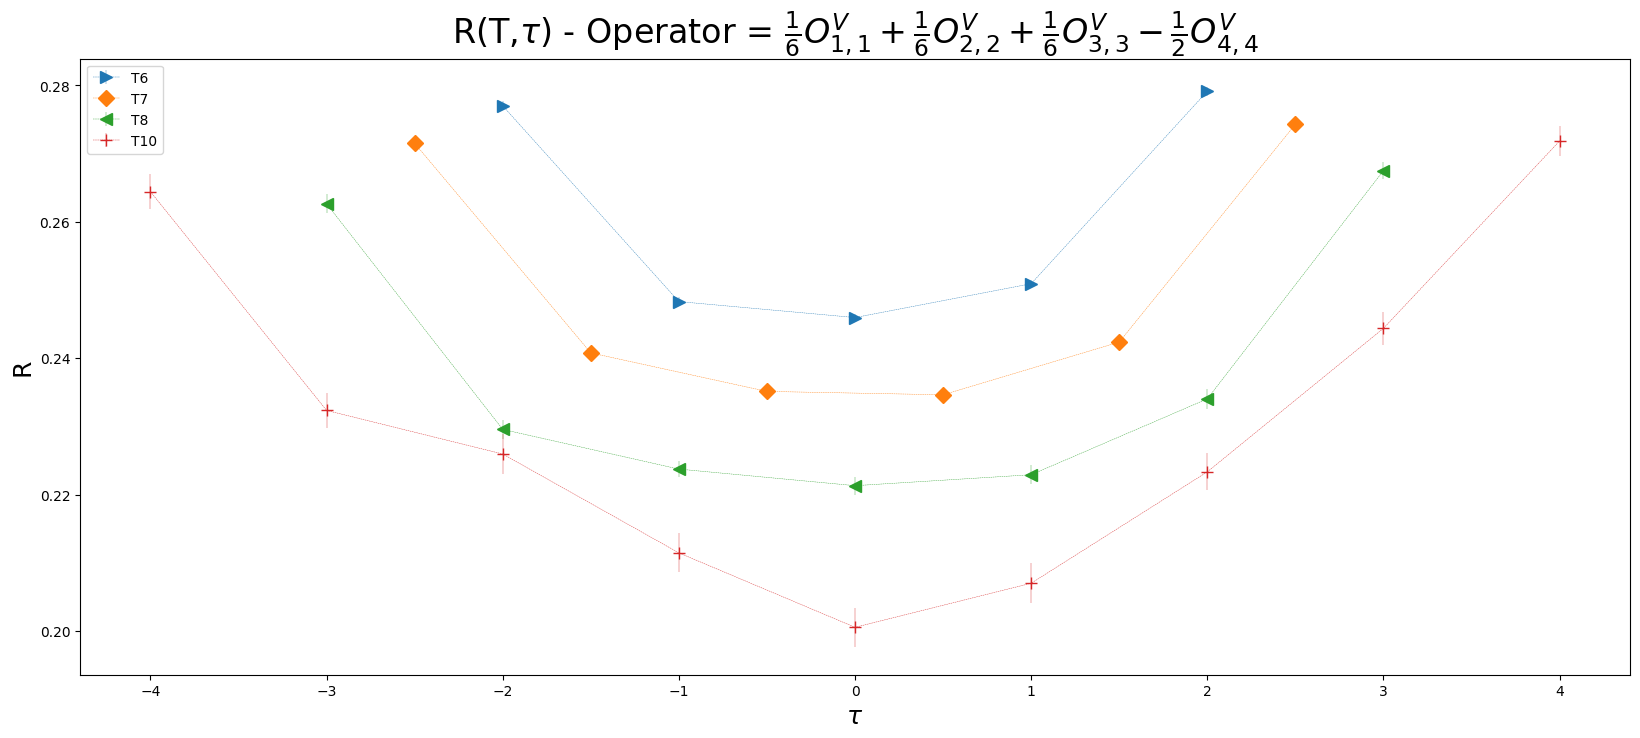

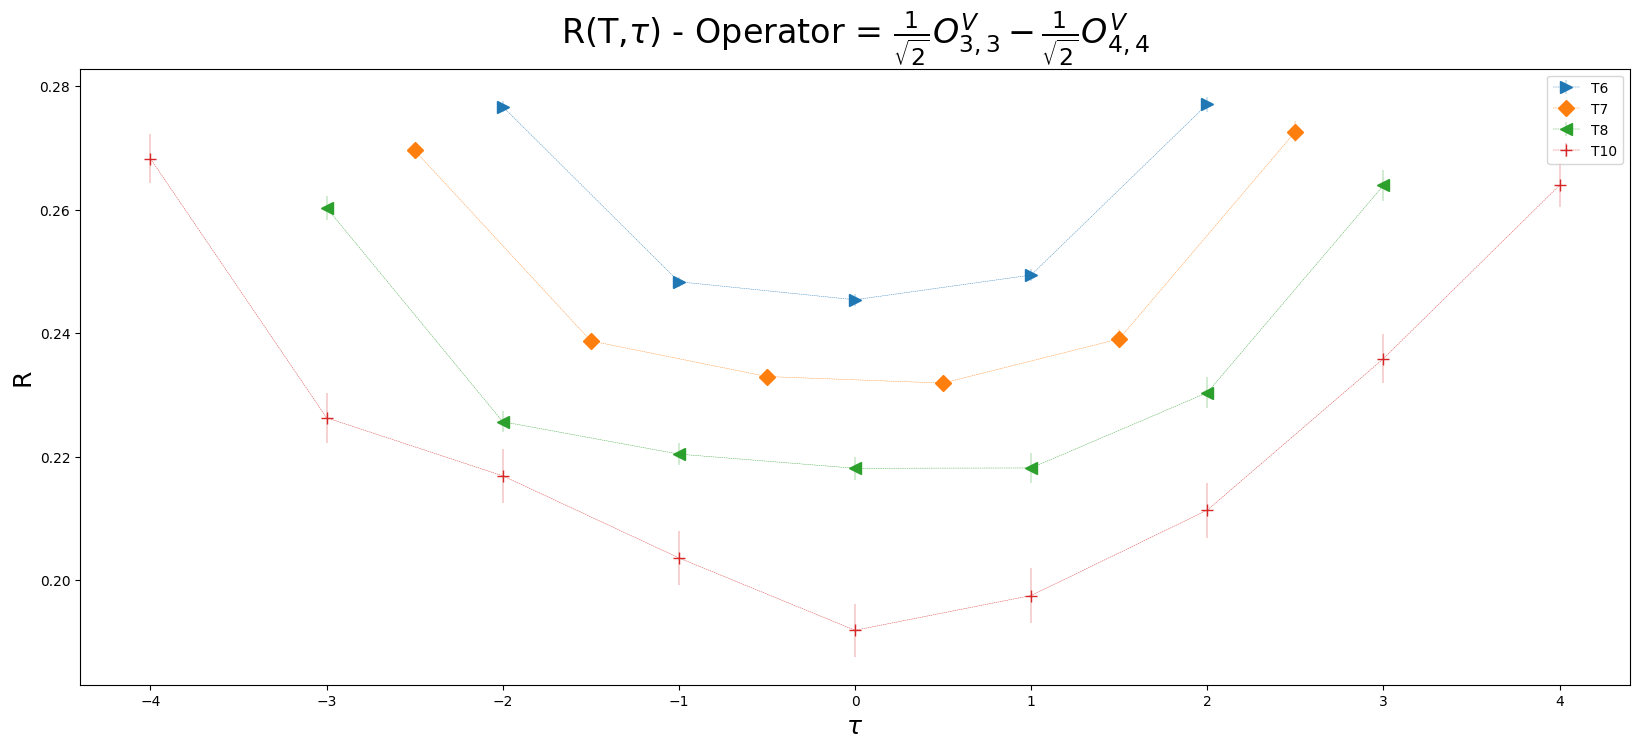

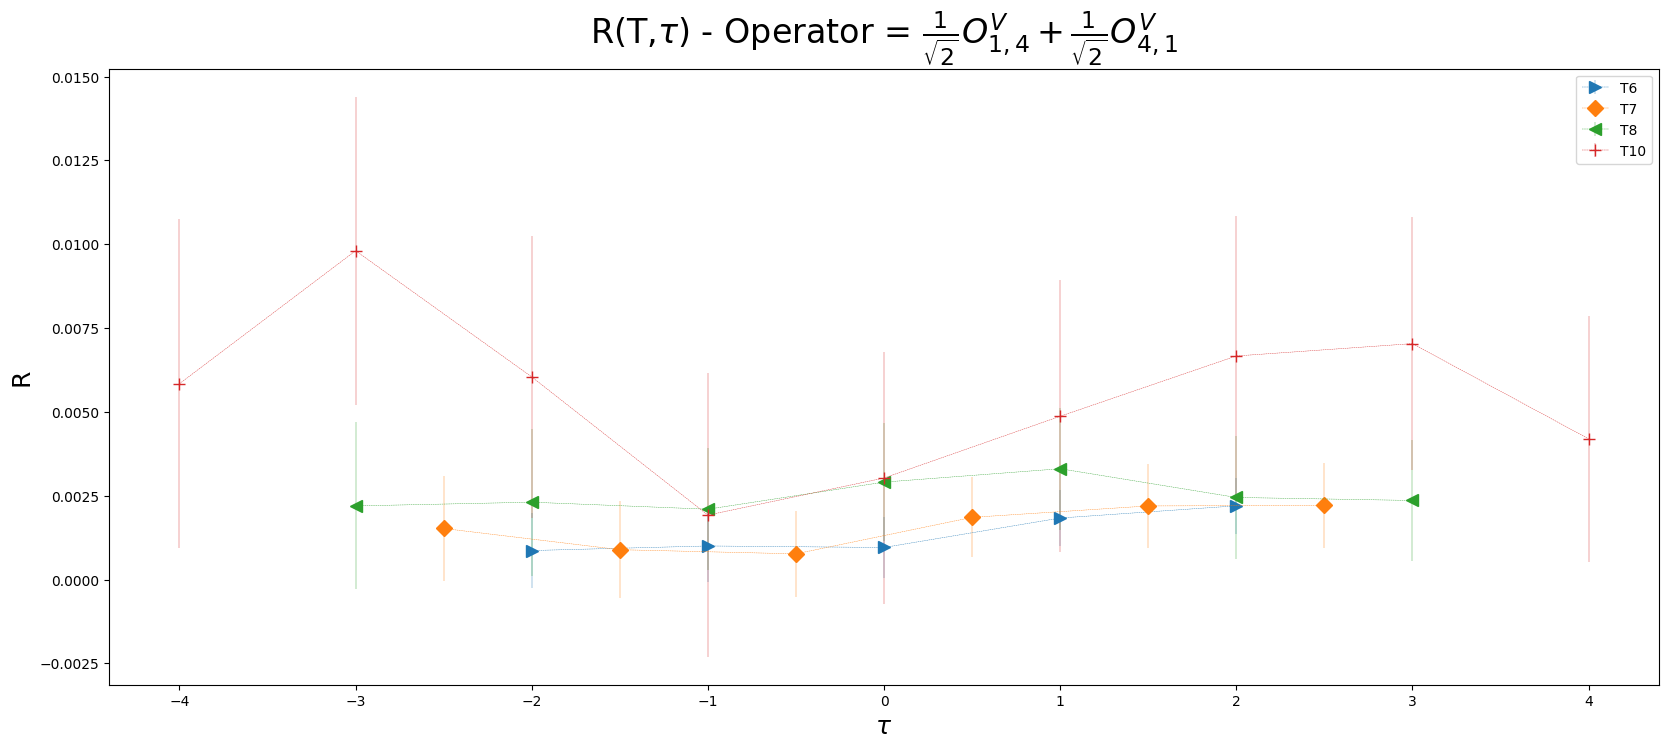

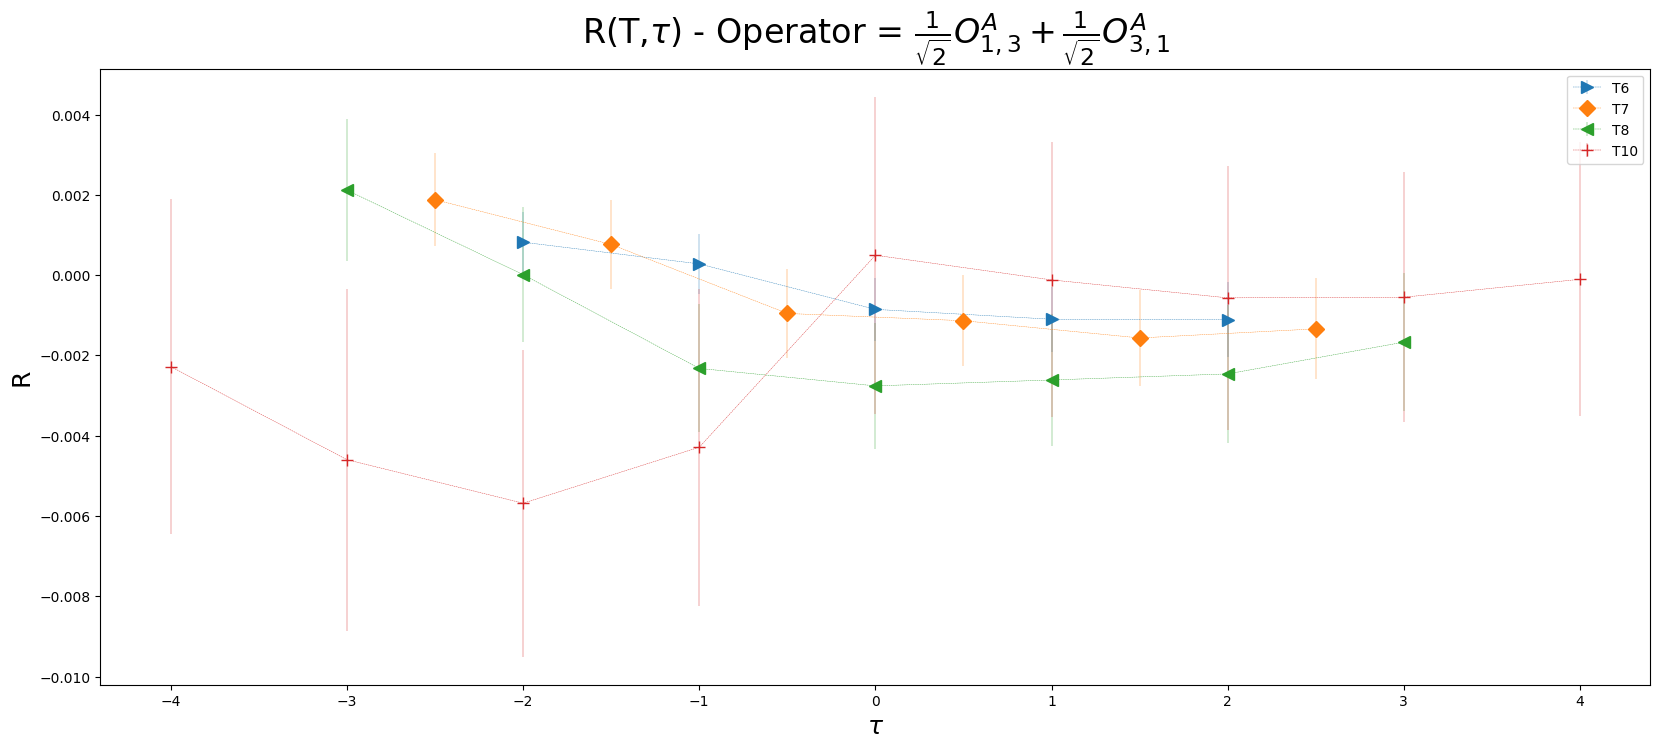

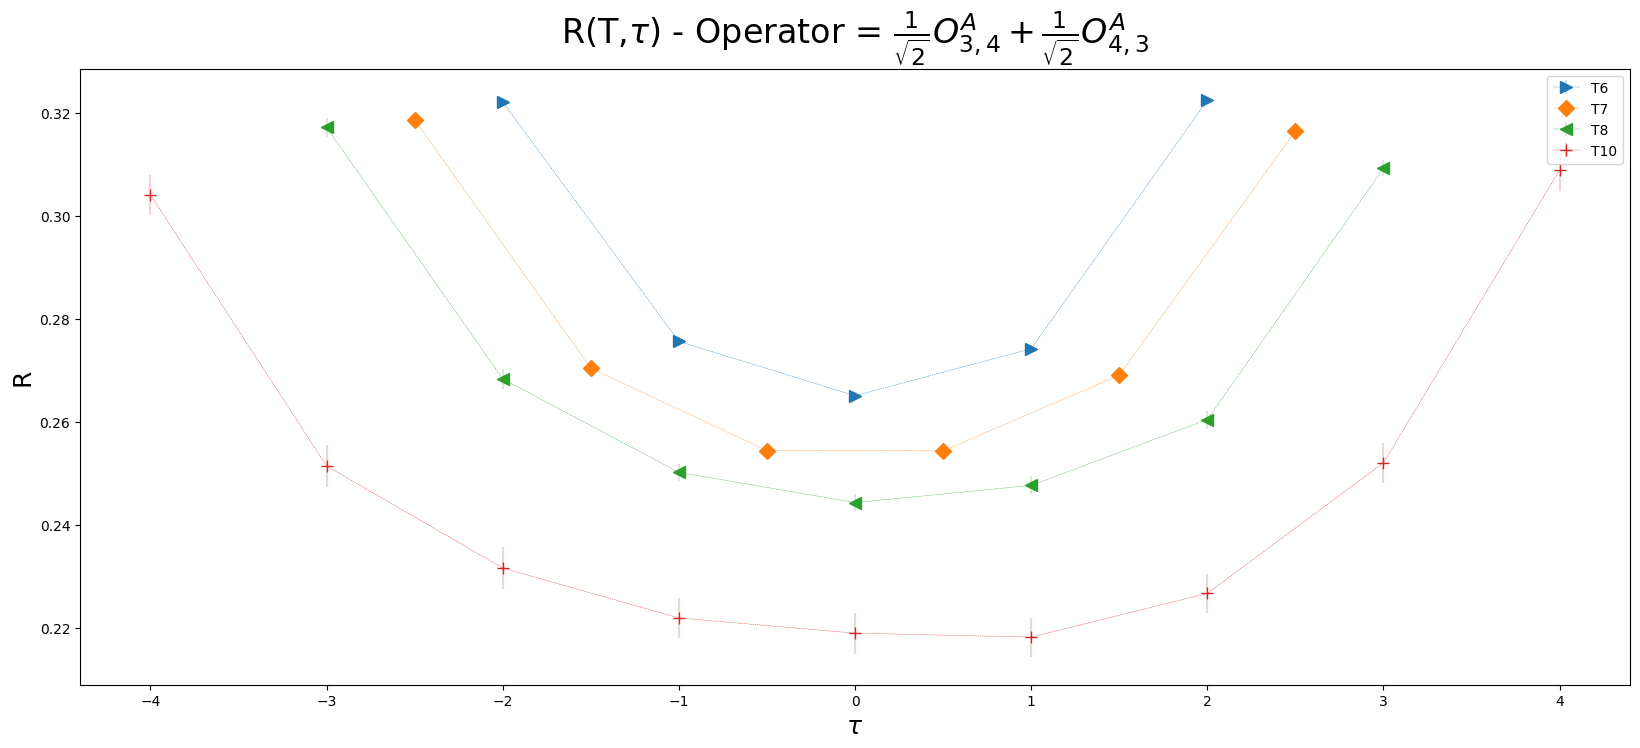

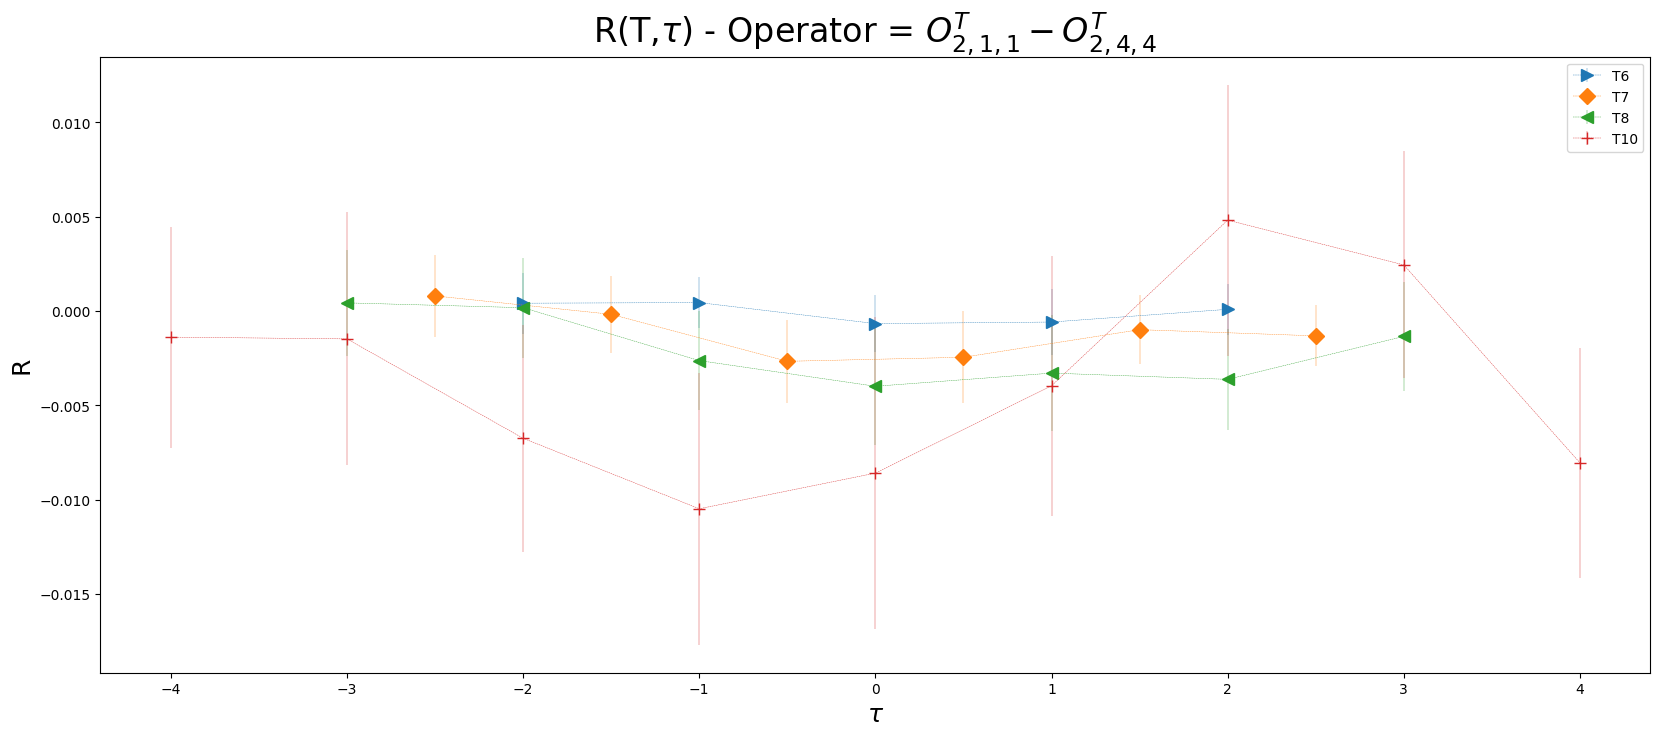

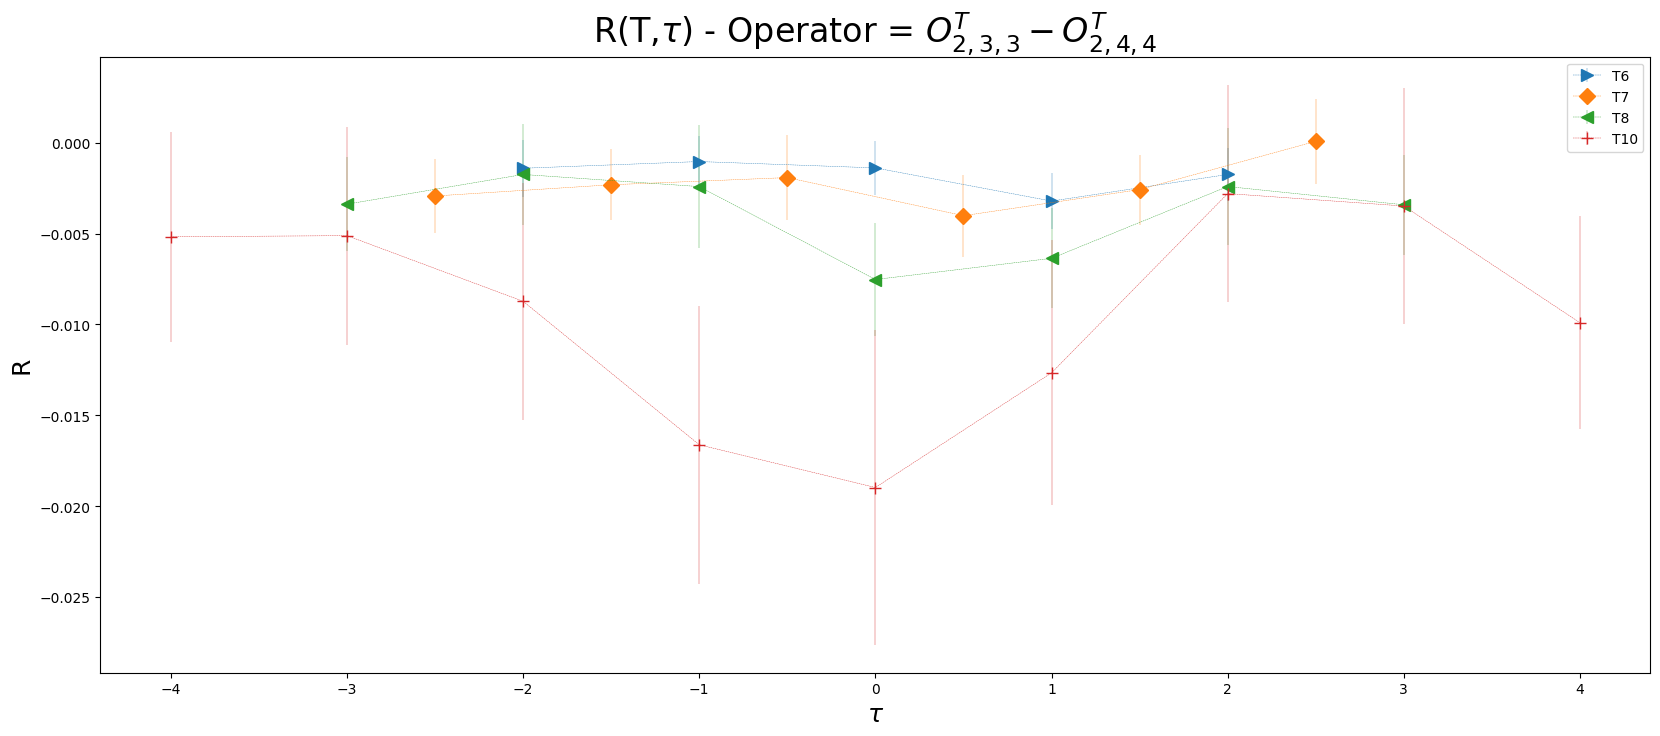

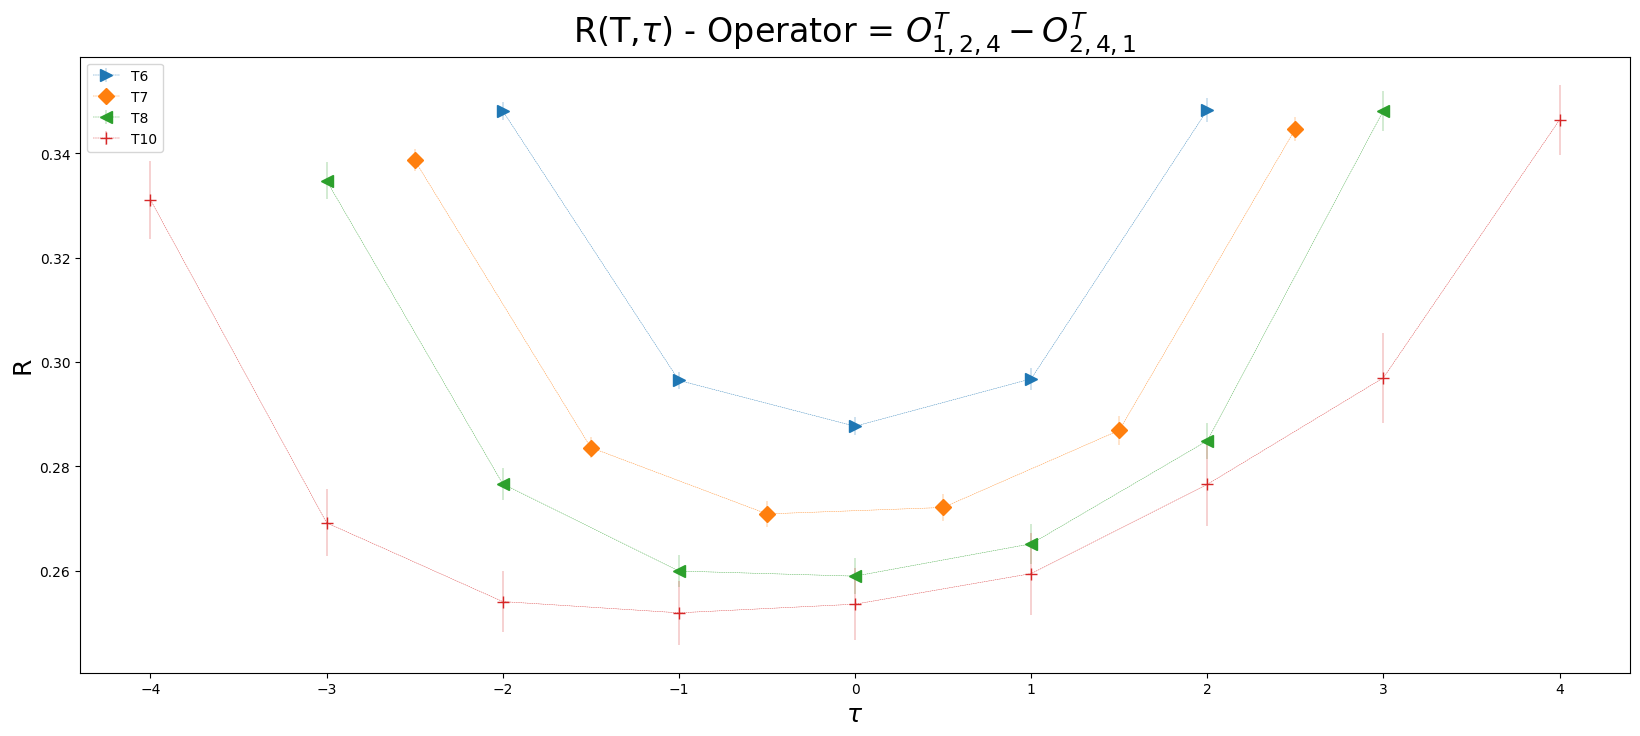

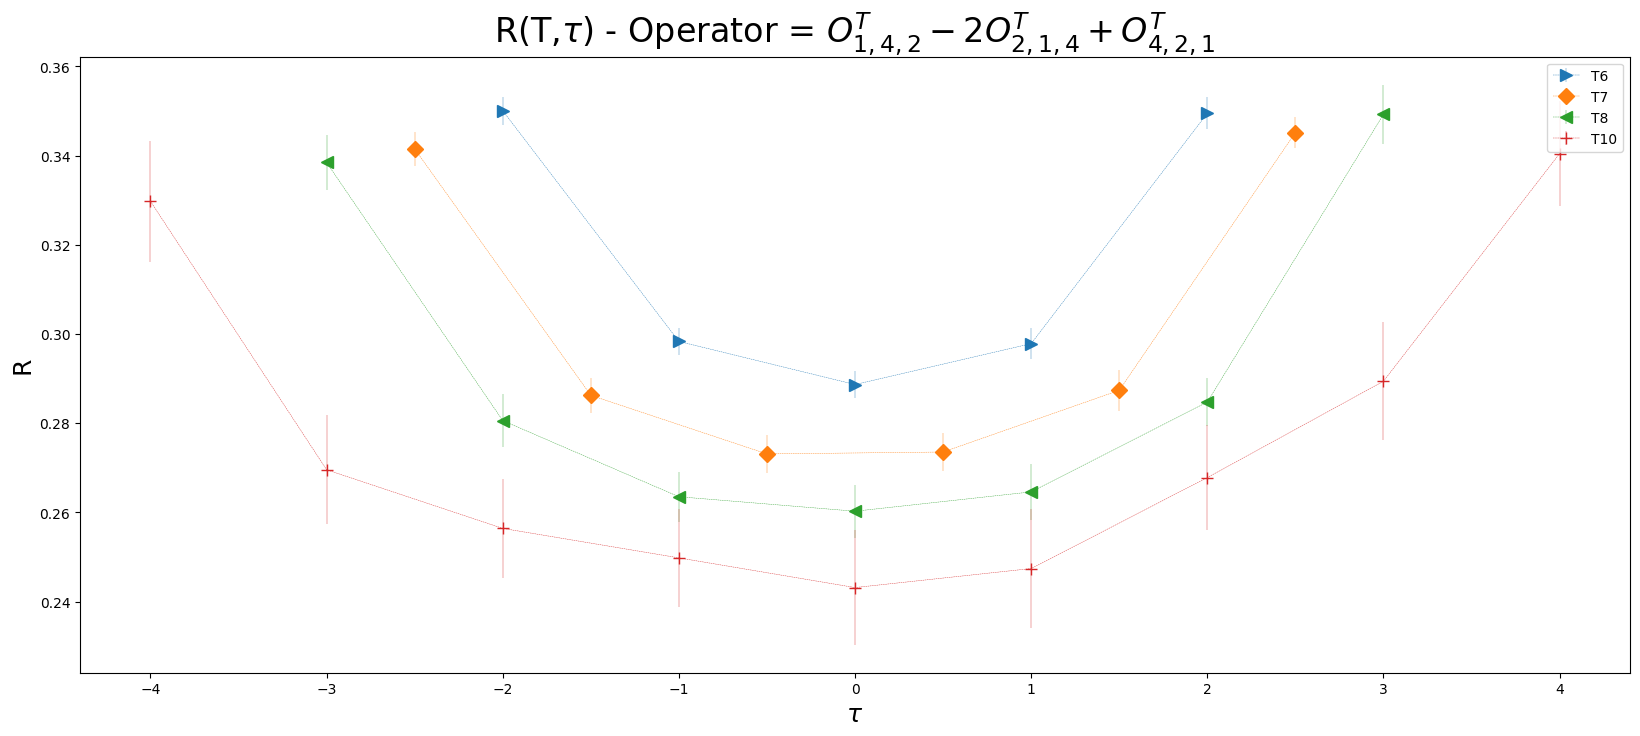

In [15]:
opAnalyzer.plot_R(rescale=True)

In [16]:
ok = np.array( [i for i in range(20)])

ok
np.take(ok,range(1,len(ok)-1),axis=0)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [17]:
fit_state = opAnalyzer.fit_2pcorr(zoom=5,show=False,save=False)

In [18]:
par = fit_state.model_average()
par.keys()
par['est']['E0']


a = 0.1163

par['est']['E0'] /a * 197.327

1000/197.327 * a

dict_keys(['est', 'err'])

np.float64(0.6987413871543884)

np.float64(1185.559257979484)

0.5893770239247543

# Fit: $\mathcal{M}$ from $R$

In [19]:
R, Rmean, Rstd, Rcovmat = opAnalyzer.get_R()

"(Nop, Nconf, NT, max(T)+1 )"
R.shape 

ValueError: not enough values to unpack (expected 4, got 3)

In [ ]:
iop = 0
iconf = 0
iT = 0
iT_value = opAnalyzer.T_list[iT] # = 6 for iT=0


R[0,0,iT,:iT_value+1]

tskip = 1


R[0,0,iT,tskip:iT_value+1-tskip]

array([-0.04231533,  0.07639338,  0.07763667,  0.08015658,  0.0783448 ,
        0.09187109, -0.02320183])

array([0.07639338, 0.07763667, 0.08015658, 0.0783448 , 0.09187109])

In [ ]:
S, Smean, Sstd = opAnalyzer.get_S(tskip=1)

"(Nop, Nconf, NT)"
S.shape

"(Nop, NT)"
Smean.shape

"(Nop, NT)"
Sstd.shape

'(Nop, Nconf, NT)'

(9, 212, 4)

'(Nop, NT)'

(9, 4)

'(Nop, NT)'

(9, 4)

In [ ]:
from moments_toolkit import sum_ratios

In [ ]:
tskip_list = [1,2,3]

S_list = np.zeros(shape=(len(opAnalyzer.selected_op), opAnalyzer.nconf, len(opAnalyzer.T_list), len(tskip_list)), # = (Nop, Nconf, NT, Ntskip)
               dtype=float)

for i_tskip, tskip in enumerate(tskip_list):

    S_list[:,:,:,i_tskip], _, _ = opAnalyzer.get_S(tskip=tskip)

In [ ]:
delta = 1
iT = 0 

MatEle = ( S_list[:,:,iT+delta,:] - S_list[:,:,iT,:] ) / delta

"(Nop, Nconf, Ntskip)"
MatEle.shape

'(Nop, Nconf, Ntskip)'

(9, 212, 3)

In [ ]:
opAnalyzer.T_list

[6, 7, 8, 10]

In [ ]:
delta_list = [1,2,3]

MatEle_list = []

for iT, iT_value in enumerate(opAnalyzer.T_list):

    for delta in delta_list:
        
        if iT_value + delta in opAnalyzer.T_list:

            print(f"T={iT_value} - delta={delta}")

            iT_plus_delta = opAnalyzer.T_list.index(iT_value + delta)

            MatEle_list.append( (S_list[:,:,iT_plus_delta,:] - S_list[:,:,iT,:])/delta )

#len(MatEle_list)

MatEle_list = np.asarray( MatEle_list )

"(Nallowed, Nop, Nconf, Ntskip)"
MatEle_list.shape

T=6 - delta=1
T=6 - delta=2
T=7 - delta=1
T=7 - delta=3
T=8 - delta=2


'(Nallowed, Nop, Nconf, Ntskip)'

(5, 9, 212, 3)

In [ ]:
MatEle_list.mean(axis=0).mean(axis=0).mean(axis=1)

array([ 0.13689866,  0.03489163,  0.02998567,  0.05511343,  0.02615796,
        0.04250643,  0.04980988,  0.10660952,  0.00103072,  0.02232661,
        0.05250478,  0.07608133,  0.06053998,  0.09342817,  0.00850935,
        0.07048116,  0.17842005,  0.07945986,  0.05290651,  0.03637961,
        0.0803321 , -0.03633381,  0.03407943,  0.06037906,  0.04308567,
        0.0653815 ,  0.11331322,  0.06811109,  0.0669869 ,  0.04355695,
        0.02624645,  0.06783022,  0.03563844,  0.04455521,  0.06832959,
        0.05621951,  0.01856541,  0.11107353,  0.05335547,  0.0616533 ,
        0.05844224,  0.07899468,  0.01956883,  0.08346447,  0.10615904,
        0.01652517,  0.0401477 , -0.01462073,  0.02703963,  0.01317704,
        0.06869284,  0.05374779,  0.02449538,  0.01730453,  0.03256718,
        0.03123149,  0.04001574,  0.01853184,  0.08695713,  0.04000854,
        0.02147445,  0.03904044,  0.05770319,  0.10171316,  0.04129312,
        0.04731027,  0.03930178,  0.04043462,  0.06760971,  0.06

In [ ]:
np.mean(MatEle_list)

np.float64(0.055730878646972584)

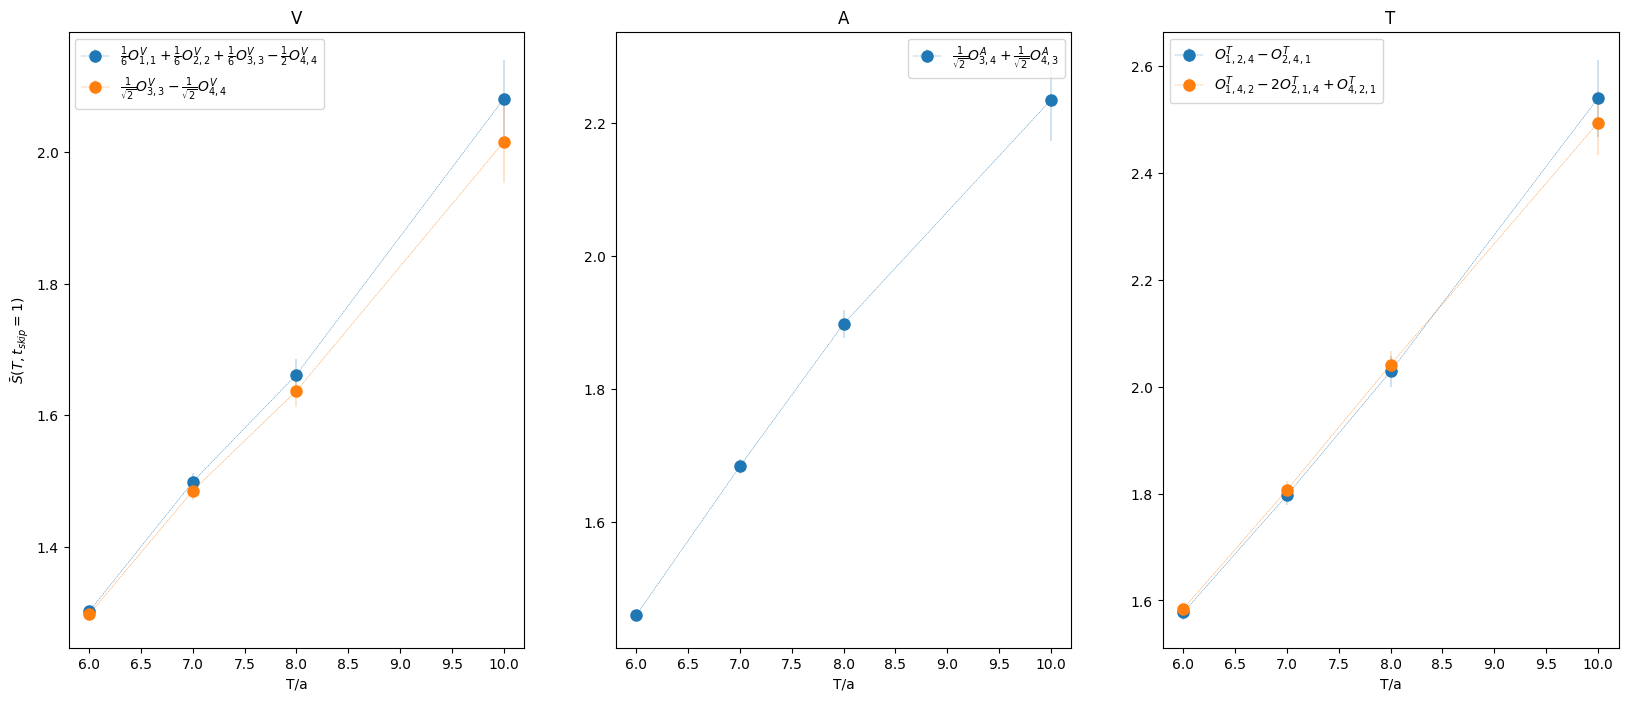

In [20]:
opAnalyzer.plot_S(tskip=1)

## $\mathcal{M}$ from $S$

In [ ]:
tskip_list = [1,2,3]

S_list = np.zeros(shape=(len(opAnalyzer.selected_op), opAnalyzer.nconf, len(opAnalyzer.T_list), len(tskip_list)), # = (Nop, Nconf, NT, Ntskip)
               dtype=float)

for i_tskip, tskip in enumerate(tskip_list):

    S_list[:,:,:,i_tskip], _, _ = opAnalyzer.get_S(tskip=tskip)

"(Nop, Nconf, NT, Ntskip)"
S_list.shape

'(Nop, Nconf, NT, Ntskip)'

(9, 212, 4, 3)

In [ ]:
delta_list = [1,2,3]

MatEle_list = []

for iT, iT_value in enumerate(opAnalyzer.T_list):

    for delta in delta_list:
        
        if iT_value + delta in opAnalyzer.T_list:

            print(f"T={iT_value} - delta={delta}")

            iT_plus_delta = opAnalyzer.T_list.index(iT_value + delta)

            MatEle_list.append( (S_list[:,:,iT_plus_delta,:] - S_list[:,:,iT,:])/delta )

MatEle_list = np.asarray( MatEle_list )

"(Nallowed, Nop, Nconf, Ntskip)"
MatEle_list.shape

T=6 - delta=1
T=6 - delta=2
T=7 - delta=1
T=7 - delta=3
T=8 - delta=2


'(Nallowed, Nop, Nconf, Ntskip)'

(5, 9, 212, 3)

In [ ]:
ok = [[1,5], [4,7], [89,37]]

In [ ]:
(1,45,6)[1:]

(45, 6)

In [ ]:
p3 = np.a